In [1]:
import pandas as pd

In [6]:
entities_df = pd.read_csv('../data/DorianGray/processed_characters.csv')
tokens_df = pd.read_csv('../data/DorianGray/character-tagging/DorianGray.tokens', delimiter='\t')
entities_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,orig_coref,character_name
0,4,112,77,79,PROP,PER,Lord Henry Wotton,112.0,Lord Henry Wotton
1,6,112,156,156,PRON,PER,him,112.0,Lord Henry Wotton
2,14,113,289,290,PROP,PER,Basil Hallward,112.0,Basil Hallward
3,27,113,396,396,PROP,PER,Basil,113.0,Basil Hallward
4,29,112,408,409,PROP,PER,Lord Henry,113.0,Lord Henry Wotton
...,...,...,...,...,...,...,...,...,...
7166,14196,307,95668,95668,PRON,PER,he,NaN,Alan Campbell
7167,14197,307,95674,95674,PRON,PER,He,NaN,Alan Campbell
7168,14215,115,95814,95816,PROP,PER,Mr. Dorian Gray,NaN,Mr. Dorian Gray
7169,14232,268,95885,95885,PROP,PER,Francis,NaN,Francis Osborne


In [7]:
tokens_df

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,The,the,0,3,DET,DT,det,1,O
1,0,0,1,1,studio,studio,4,10,NOUN,NN,nsubjpass,3,O
2,0,0,2,2,was,be,11,14,AUX,VBD,auxpass,3,O
3,0,0,3,3,filled,fill,15,21,VERB,VBN,ROOT,3,O
4,0,0,4,4,with,with,22,26,ADP,IN,prep,3,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96039,1490,6159,11,96039,recognized,recognize,426538,426548,VERB,VBD,relcl,96036,O
96040,1490,6159,12,96040,who,who,426549,426552,PRON,WP,attr,96042,O
96041,1490,6159,13,96041,it,it,426553,426555,PRON,PRP,nsubj,96042,O
96042,1490,6159,14,96042,was,be,426556,426559,AUX,VBD,ccomp,96039,O


In [9]:
character_of_interest = 'Mr. Dorian Gray'
token_window = 25

In [10]:
mentions_df = entities_df[entities_df.character_name == character_of_interest]
mentions_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,orig_coref,character_name
44,155,115,1235,1236,PROP,PER,Dorian Gray,115.0,Mr. Dorian Gray
45,159,115,1258,1259,PROP,PER,Dorian Gray,112.0,Mr. Dorian Gray
46,160,115,1263,1263,PRON,PER,his,116.0,Mr. Dorian Gray
49,164,115,1284,1284,PRON,PER,his,112.0,Mr. Dorian Gray
116,266,115,1852,1853,PROP,PER,Dorian Gray,115.0,Mr. Dorian Gray
...,...,...,...,...,...,...,...,...,...
7076,14083,115,94674,94674,PRON,PER,He,NaN,Mr. Dorian Gray
7077,14084,115,94678,94678,PRON,PER,him,NaN,Mr. Dorian Gray
7079,14086,115,94695,94695,PRON,PER,him,NaN,Mr. Dorian Gray
7080,14087,115,94702,94702,PRON,PER,he,NaN,Mr. Dorian Gray


In [11]:
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


sentiment_predictor = SentimentIntensityAnalyzer()

In [20]:
import string
sentiments_by_mentions = []


for _, row in mentions_df.iterrows():
    mention_tokens = []
    for _, token_row in tokens_df[max(row.start_token - token_window, 0):min(row.end_token + token_window, len(tokens_df) - 1)].iterrows():
        if isinstance(token_row.word, str) and token_row.word != '\t' and token_row.word not in string.punctuation:
            mention_tokens.append(token_row.word)
    try:
        polarity = sentiment_predictor.polarity_scores(' '.join(mention_tokens))['compound']
    except:
        print(mention_tokens)
    sentiments_by_mentions.append(polarity)

In [21]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (25., 10.)

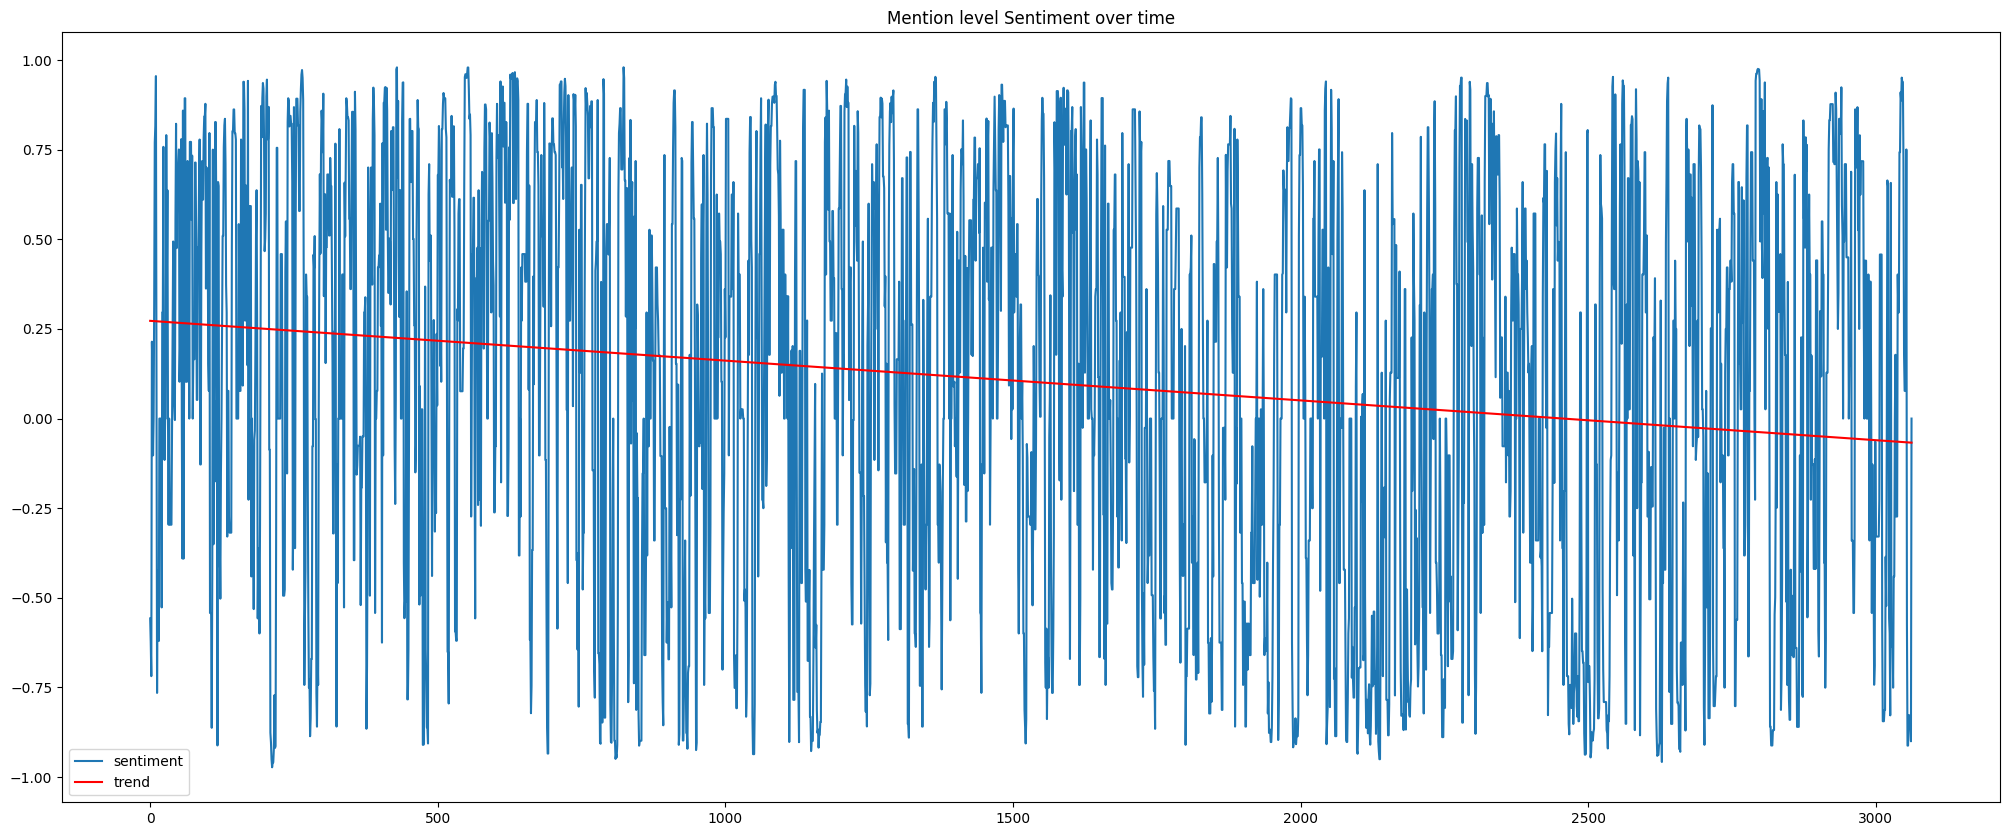

In [22]:
x = np.arange(len(sentiments_by_mentions))
slope, intercept = np.polyfit(x, sentiments_by_mentions, 1)

plt.plot(x, sentiments_by_mentions, label='sentiment')
plt.plot(x, slope*x + intercept, color='red', label='trend')
plt.title('Mention level Sentiment over time')
plt.legend()
plt.show()

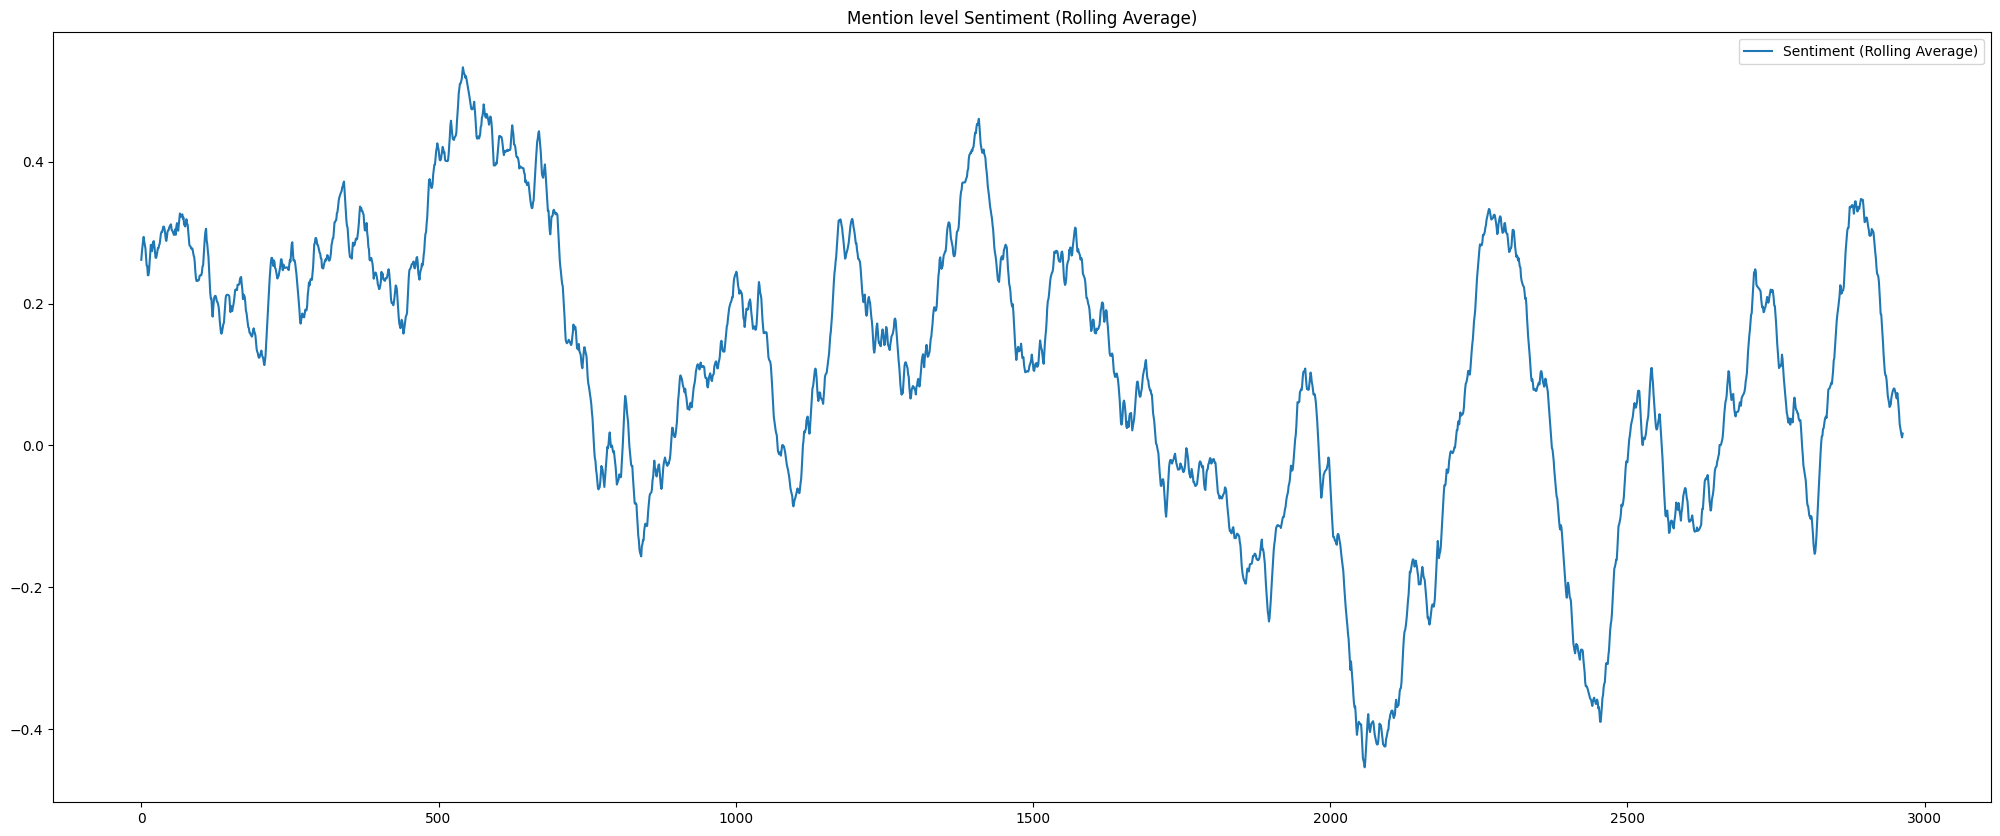

In [24]:
N = 100
rolling_average = pd.Series(sentiments_by_mentions).rolling(window=N).mean().iloc[N-1:].values

x = np.arange(len(rolling_average))

plt.plot(x, rolling_average, label='Sentiment (Rolling Average)')
plt.title('Mention level Sentiment (Rolling Average)')
plt.legend()
plt.show()